In [1]:
from PIL import Image

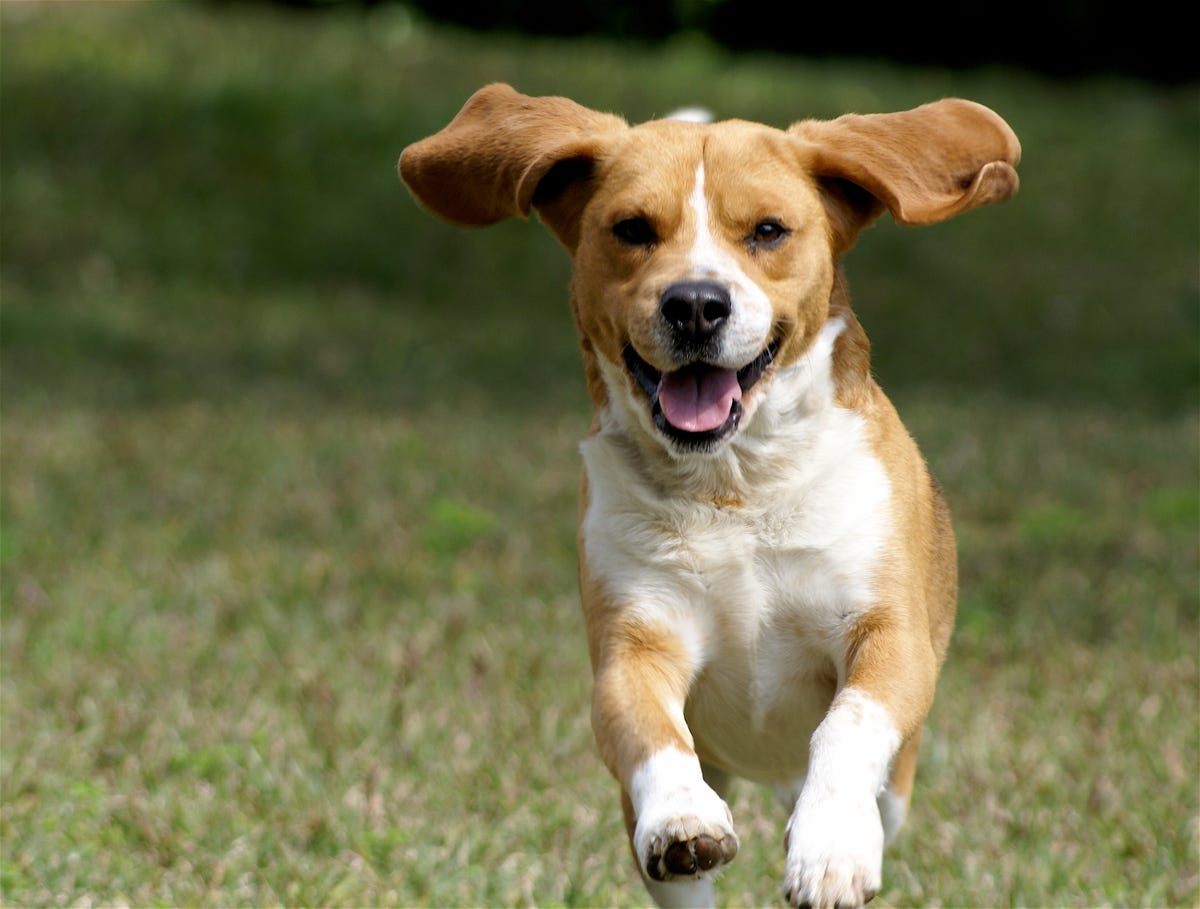

In [2]:
img = Image.open('assets/dog.png')
img

In [3]:
img.size

(1200, 909)

In [10]:
# get flattened image pixel data
raw_img_data = list(img.getdata())

# organise pixels into 2d list
img_data = [[raw_img_data[x + y*img.width] for y in range(img.height)] for x in range(img.width)]


In [5]:
class Grid:
    def __init__(self, table):
        self.table = table

    def __repr__(self):
        return self.table

    def first_row(self, step):
        data = self.table.pop(0)
        return data[::step]

    def last_row(self, step):
        data = self.table.pop(-1)
        return data[::step]

    def first_column(self, step):
        data = [self.table[i].pop(0)for i in range(len(self.table))]
        return data[::step]

    def last_column(self, step):
        data = [self.table[i].pop(-1)for i in range(len(self.table))]
        return data[::step]

    def done(self):
        return [j for i in self.table for j in i] == []

In [11]:
def spiral(list_data):
    data = Grid(list_data.copy())
    movement = 0
    move_options = {
        0: data.first_row,
        1: data.last_column,
        2: data.last_row,
        3: data.first_column
    }
    spiral = []
    while True:
        try:
            spiral.extend(move_options.get(movement % 4)
                          (1 if (movement % 4) < 2 else -1))
            movement += 1
        except IndexError:
            if data.done():
                break
    return spiral
spiral_img_data = spiral(img_data)

[(159, 150, 111),
 (147, 138, 99),
 (143, 135, 96),
 (144, 136, 97),
 (137, 132, 92),
 (137, 132, 92),
 (137, 134, 93),
 (134, 131, 90),
 (128, 126, 85),
 (127, 125, 84),
 (124, 125, 83),
 (123, 124, 82),
 (120, 123, 80),
 (118, 121, 78),
 (115, 121, 77),
 (115, 121, 77),
 (114, 119, 78),
 (113, 118, 77),
 (112, 117, 76),
 (111, 116, 75),
 (110, 116, 72),
 (109, 115, 71),
 (108, 114, 70),
 (107, 113, 69),
 (103, 109, 63),
 (103, 109, 63),
 (102, 108, 62),
 (101, 107, 61),
 (99, 105, 59),
 (98, 104, 58),
 (97, 103, 57),
 (97, 103, 57),
 (97, 104, 60),
 (97, 104, 60),
 (97, 104, 60),
 (97, 104, 60),
 (97, 104, 60),
 (97, 104, 60),
 (96, 105, 58),
 (96, 105, 58),
 (94, 103, 56),
 (94, 103, 56),
 (94, 104, 54),
 (94, 104, 54),
 (91, 103, 53),
 (91, 103, 53),
 (90, 102, 52),
 (90, 102, 52),
 (89, 101, 51),
 (89, 101, 51),
 (89, 101, 51),
 (88, 100, 50),
 (87, 101, 50),
 (87, 101, 50),
 (86, 100, 49),
 (86, 100, 49),
 (84, 101, 49),
 (84, 101, 49),
 (83, 100, 48),
 (83, 100, 48),
 (82, 99, 4